In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import time

In [49]:
x = pd.read_csv("data/0_x.csv", header = None)
y = pd.read_csv("data/0_y.csv", header = None)
if isinstance(y, pd.DataFrame):
    y = y.iloc[:]
if isinstance(x, pd.DataFrame):
    x = x.iloc[:]
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


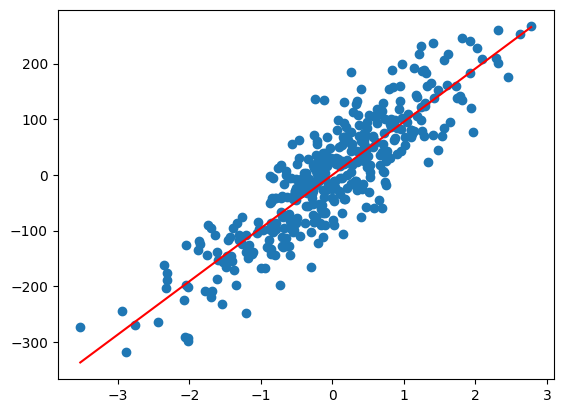

In [50]:
binary = LinearRegression()
binary.fit(x[[1]], y)
y_pred = binary.predict(x[[1]])
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [51]:
r2_score(y_pred=y_pred, y_true=y)

0.7699743283650629

Множественная регрессия

In [52]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

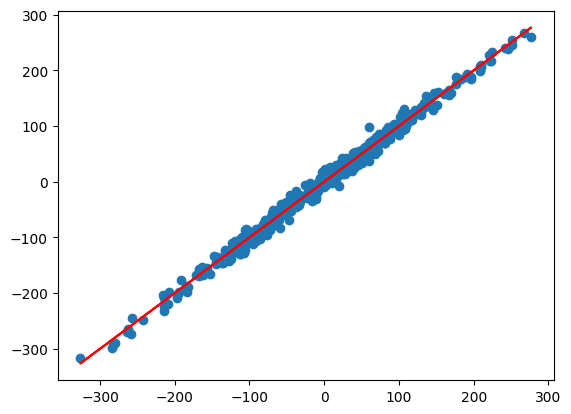

In [53]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

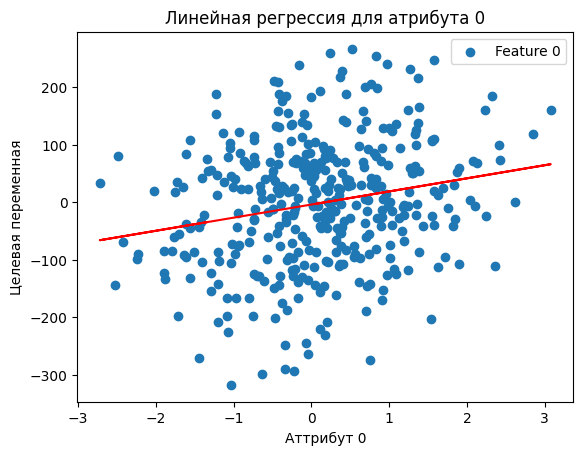

Атрибут 0 Коэффициент: [[22.78111342]]


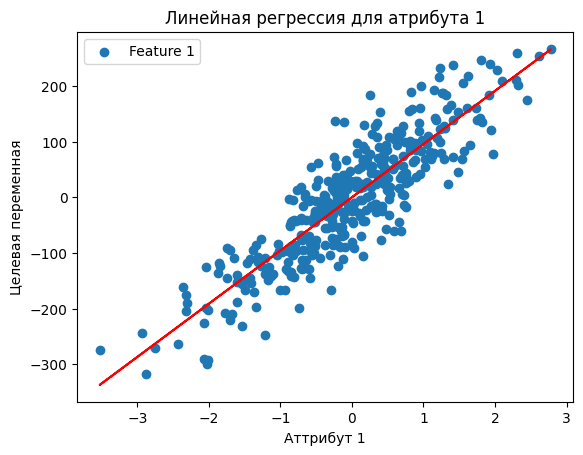

Атрибут 1 Коэффициент: [[95.52010745]]


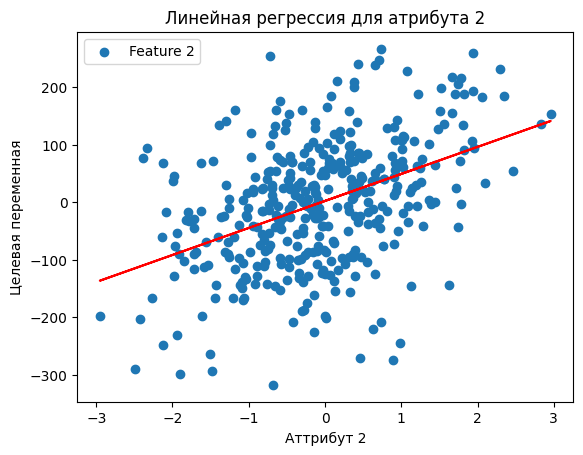

Атрибут 2 Коэффициент: [[46.94897635]]


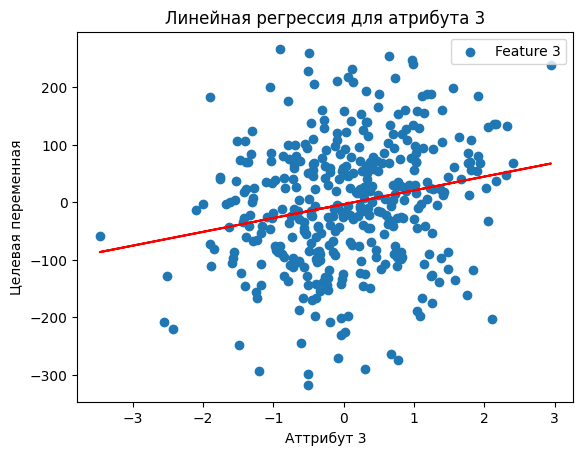

Атрибут 3 Коэффициент: [[23.99882407]]


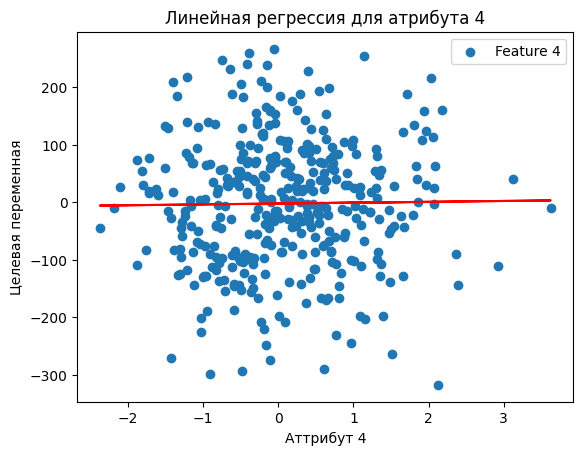

Атрибут 4 Коэффициент: [[1.49082042]]


In [54]:
for i in range(x.shape[1]):
    # Создание и обучение модели
    model = LinearRegression()
    model.fit(x[[i]], y)
    
    # Визуализация данных и регрессии
    plt.scatter(x[i], y, label=f'Feature {i}')
    plt.plot(x[i], model.predict(x[[i]]), c='r')
    
    plt.xlabel(f'Аттрибут {i}')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.title(f'Линейная регрессия для атрибута {i}')
    plt.show()

    # Вывод коэффициента регрессии
    print(f'Атрибут {i} Коэффициент:', model.coef_)

2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

In [55]:
class MultiLinearRegression(object):
    def __init__(self, n_features):
        # Инициализируем коэффициенты: b0 (смещение) и веса для каждого признака
        self.b0 = 0  # intercept
        self.b = np.zeros(n_features)  # коэффициенты для каждого признака
        
    def predict(self, X):
        # X должен быть 2D массивом (даже если одна строка)
        return self.b0 + np.dot(X, self.b)
    
    def error(self, X, Y):
        return np.sum((self.predict(X) - Y) ** 2) / (2 * len(X))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000, min_delta=1e-6):
        steps, errors = [], []
        step = 0
        prev_err = None
        n_samples = len(X)
        
        # Сохраняем начальные значения параметров для возможного отката
        start_b0, start_b = self.b0, self.b.copy()
        
        while step < max_steps:
            # Вычисляем градиенты
            predictions = self.predict(X)
            errors_grad = predictions - Y
            
            # Градиент для b0 (смещение)
            dJ0 = np.sum(errors_grad) / n_samples
            
            # Градиенты для весов признаков
            dJ = np.dot(X.T, errors_grad) / n_samples
            
            self.b0 -= alpha * dJ0
            self.b -= alpha * dJ
            new_err = self.error(X, Y)
            
            # Проверяем, увеличилась ли ошибка
            if prev_err is not None and new_err > prev_err:
                # Если ошибка увеличилась, уменьшаем шаг и восстанавливаем параметры
                alpha /= 2
                self.b0, self.b = start_b0, start_b.copy()
                continue
            
            # Проверка на сходимость
            if prev_err is not None and abs(prev_err - new_err) < min_delta:
                print('Остановка по критерию незначительного изменения ошибки')
                break
                
            prev_err = new_err
            step += 1
            steps.append(step)
            errors.append(new_err)
            start_b0, start_b = self.b0, self.b.copy()
        
        if step == max_steps:
            print('Достигнуто максимальное количество шагов')
        return steps, errors
    
    def plot(self, steps, errors):
        plt.figure()
        plt.plot(steps, errors)
        plt.xlabel('Шаги')
        plt.ylabel('Ошибка')
        plt.title('График обучения')
        plt.show()

In [56]:
hyp = MultiLinearRegression(n_features=5)
hyp.fit(x, y)
y_pred = multiple.predict(x)
plt.scatter(y_pred, y)
plt.plot(y_pred, y_pred, c='r')

ValueError: Unable to coerce to Series, length must be 1: given 387

3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

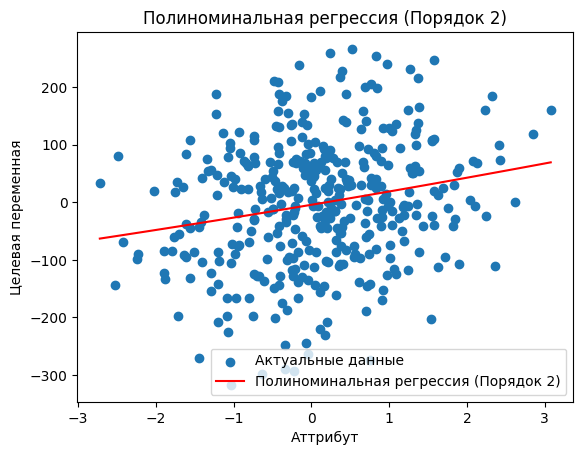

R^2 Оценка (Порядок 2): 0.04367170367915507
time studying: 0.12846112251281738


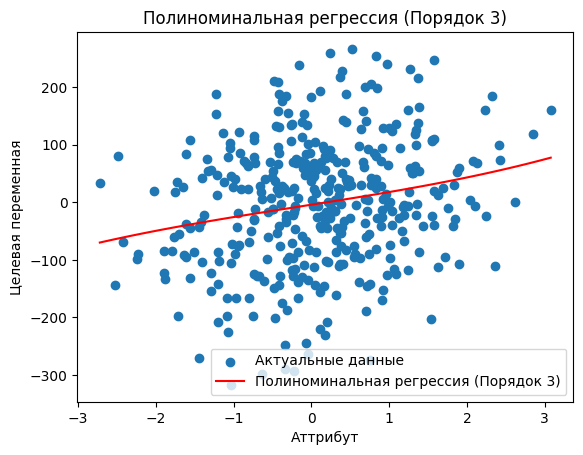

R^2 Оценка (Порядок 3): 0.04376506816920167
time studying: 0.09580564498901367


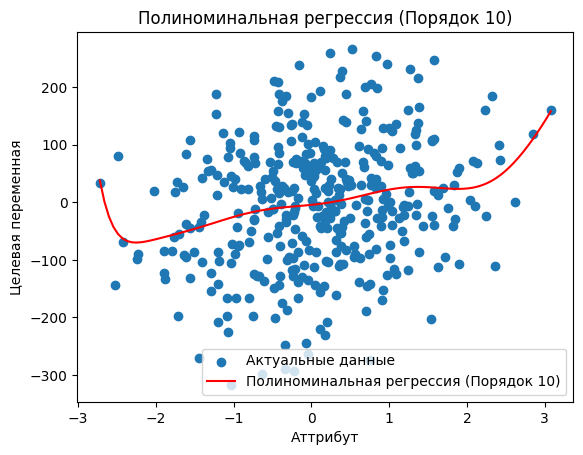

R^2 Оценка (Порядок 10): 0.05035596325168745
time studying: 0.10266399383544922


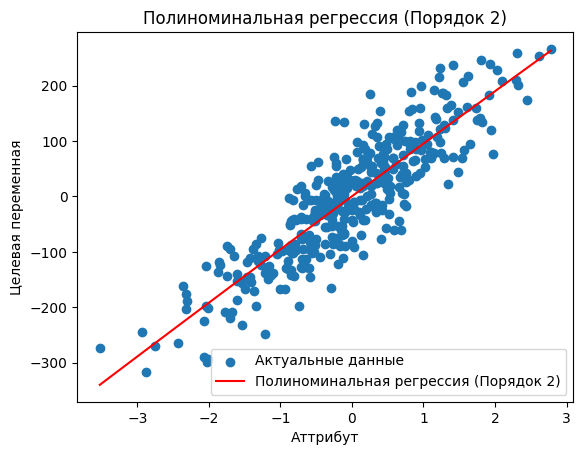

R^2 Оценка (Порядок 2): 0.7699942588883133
time studying: 0.0990440845489502


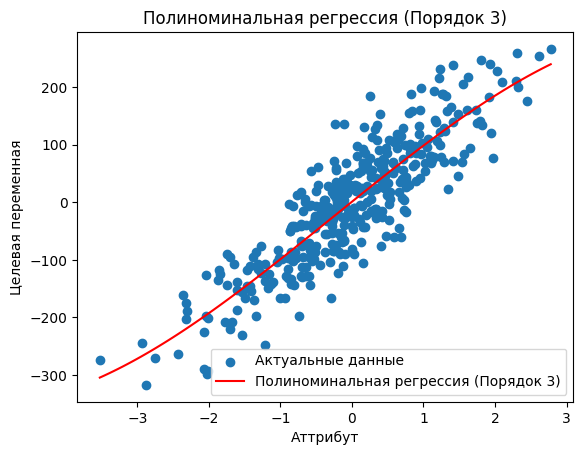

R^2 Оценка (Порядок 3): 0.7711184109235001
time studying: 0.09673166275024414


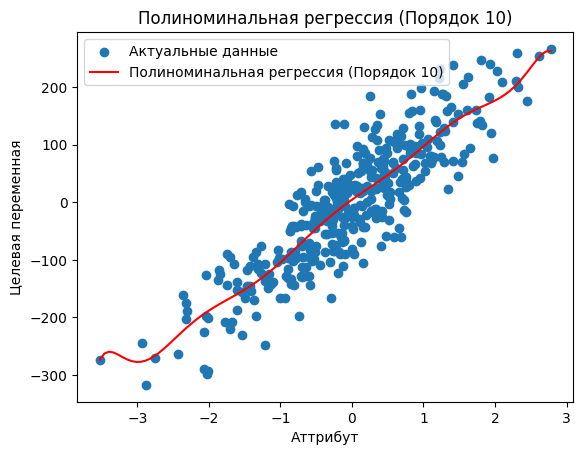

R^2 Оценка (Порядок 10): 0.7726769307411921
time studying: 0.10375332832336426


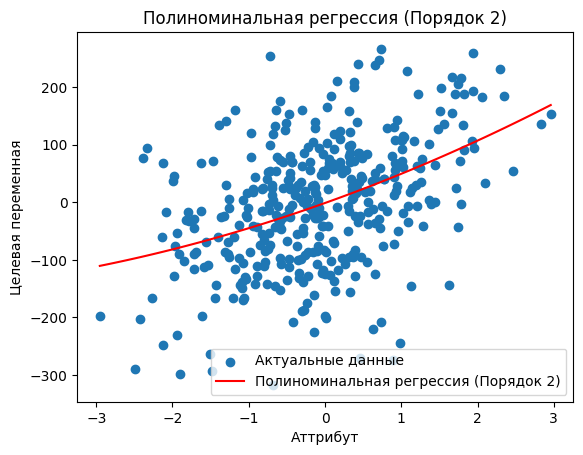

R^2 Оценка (Порядок 2): 0.19000787278473819
time studying: 0.09998464584350586


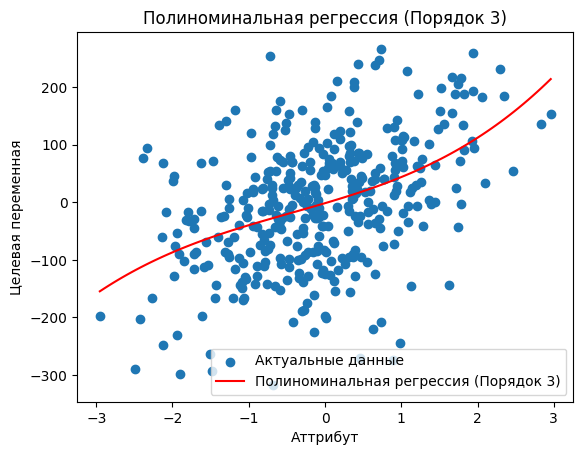

R^2 Оценка (Порядок 3): 0.19280163734543843
time studying: 0.09871125221252441


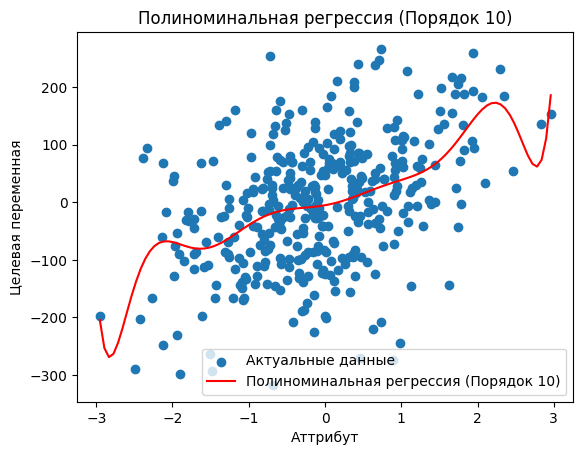

R^2 Оценка (Порядок 10): 0.20440944561264418
time studying: 0.13879108428955078


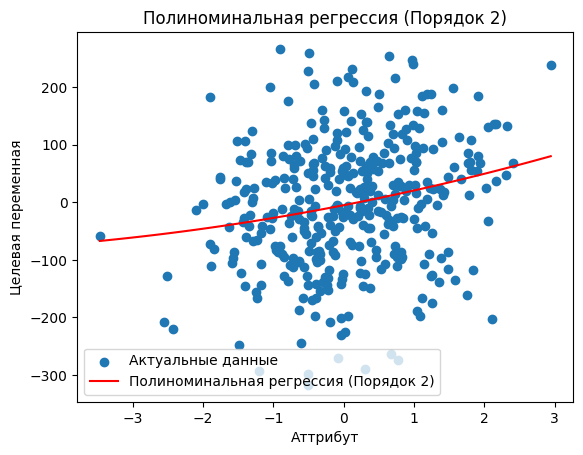

R^2 Оценка (Порядок 2): 0.04794250960519941
time studying: 0.1046743392944336


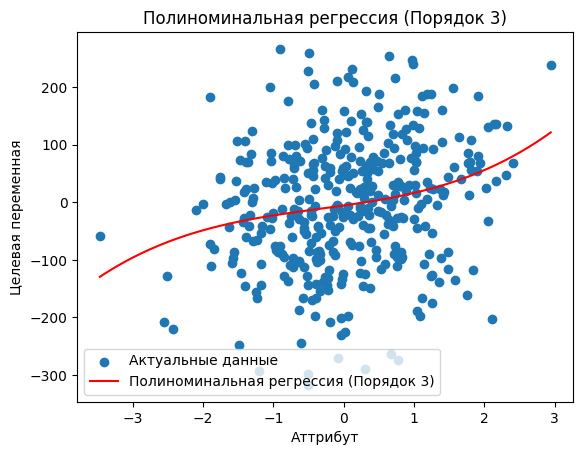

R^2 Оценка (Порядок 3): 0.05031163217811918
time studying: 0.10045266151428223


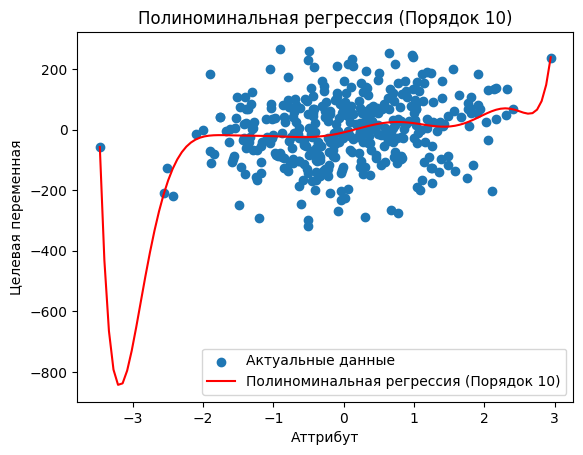

R^2 Оценка (Порядок 10): 0.07266746559268988
time studying: 0.10315966606140137


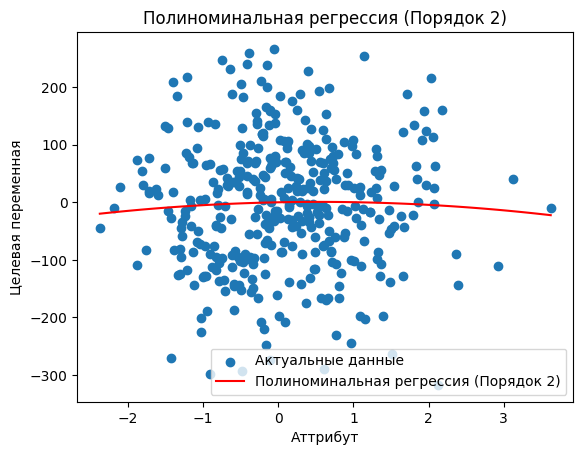

R^2 Оценка (Порядок 2): 0.0010490365524417067
time studying: 0.09571027755737305


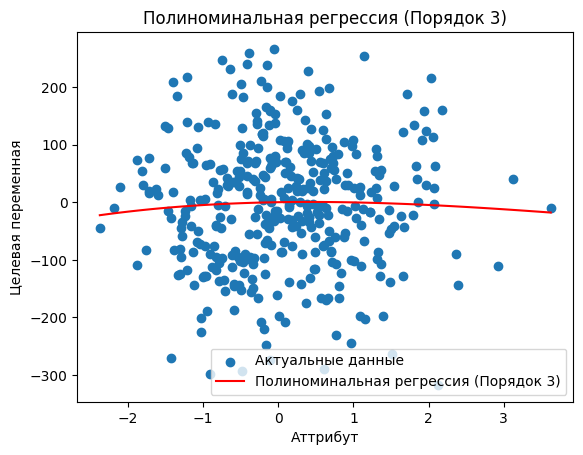

R^2 Оценка (Порядок 3): 0.0010646025332345932
time studying: 0.09734892845153809


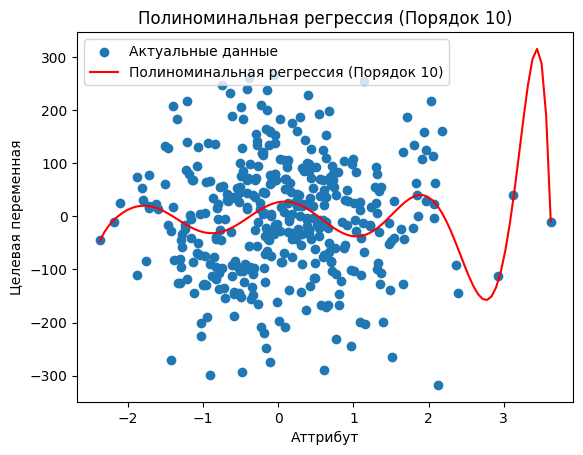

R^2 Оценка (Порядок 10): 0.0450526417134679
time studying: 0.09430980682373047


In [ ]:
# Функция для построения полиномиальной регрессии и визуализации результатов
def polynomial_regression(x, y, degree):
    # Преобразование признаков в полиномиальные
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    # Обучение модели
    model = LinearRegression()
    model.fit(x_poly, y)

    # Предсказание значений
    x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)  # Создаем равномерное распределение точек для построения графика
    x_range_poly = poly.transform(x_range)
    y_pred = model.predict(x_range_poly)

    # Визуализация данных и регрессии
    plt.scatter(x, y, label='Актуальные данные')
    plt.plot(x_range, y_pred, c='r', label=f'Полиноминальная регрессия (Порядок {degree})')
    
    plt.xlabel('Аттрибут')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.title(f'Полиноминальная регрессия (Порядок {degree})')
    plt.show()

    # Вывод коэффициента детерминации (R^2 Score)
    y_pred_all = model.predict(x_poly)
    r2 = r2_score(y, y_pred_all)
    print(f'R^2 Оценка (Порядок {degree}):', r2)

# Построение полиномиальных регрессий для целевой переменной и каждого из признаков
for i in range(x.shape[1]):
    for degree in [2, 3, 10]:
        start_time = time.time()
        polynomial_regression(x[[i]], y, degree)
        end_time = time.time()
        print(f'time studying: {abs(end_time-start_time)}')

Чем ближе R² к 1, тем лучше модель. Однако увеличение порядка полинома может привести к переобучению модели.

4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [ ]:
def evaluate_model(x, y, model, degree):
    # Преобразование признаков в полиномиальные
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    # Разделение данных на обучающий и тестовый наборы
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

    # Обучение модели
    model.fit(x_train, y_train)

    # Предсказание значений на тестовом наборе
    y_pred = model.predict(x_test)

    # Оценка точности (R^2 Score)
    r2 = r2_score(y_test, y_pred)

    return r2

# Сводная таблица
results = pd.DataFrame(columns=['Аттрибут', 'Порядок', 'R^2 Оценка'])

# Построение и оценка моделей для целевой переменной и каждого из признаков
for i in range(x.shape[1]):
    for degree in [2, 3, 10]:
        model = LinearRegression()
        r2 = evaluate_model(x[[i]], y, model, degree)
        results = pd.concat([results, pd.DataFrame({'Аттрибут': [f'Аттрибут {i}'], 'Порядок': [degree], 'R^2 Оценка': [r2]})], ignore_index=True)

# Вывод сводной таблицы
print(results)

Аттрибут 0 (Порядок 2, R² = 0.051623): Низкое значение R² говорит о том, что модель с порядком 2 недостаточно хорошо соответствует данным. Это может быть признаком недообучения.

Аттрибут 0 (Порядок 3, R² = 0.051229): Также низкое значение R², что подтверждает недостаточную пригодность модели для данных.

Аттрибут 0 (Порядок 10, R² = 0.021485): Еще более низкое значение R², что указывает на недообучение. Более высокий порядок полинома может привести к переобучению.

Аттрибут 1 (Порядок 2, R² = 0.847859): Высокое значение R², что говорит о хорошей соответствии модели данным. Вероятно, это подходящий порядок полинома.

Аттрибут 1 (Порядок 3, R² = 0.851289): Еще более высокое значение R², что подтверждает хорошую пригодность модели.

Аттрибут 1 (Порядок 10, R² = -19.946667): Очень низкое и даже отрицательное значение R² указывает на переобучение модели. Это может быть результатом слишком высокого порядка полинома.

Аттрибут 2 (Порядок 2, R² = 0.107122): Низкое значение R², что говорит о недостаточной пригодности модели.

Аттрибут 2 (Порядок 3, R² = 0.103903): Аналогично, низкое значение R² подтверждает недостаточное соответствие модели данным.

Аттрибут 2 (Порядок 10, R² = 0.099079): Значение R² остается низким, что указывает на недостаточную пригодность.

Аттрибут 3 (Порядок 2, R² = 0.039983): Низкое значение R², недостаточная пригодность модели.

Аттрибут 3 (Порядок 3, R² = 0.038443): Аналогично, низкое значение R² подтверждает недостаточное соответствие модели данным.

Аттрибут 3 (Порядок 10, R² = 0.005776): Значение R² остается низким, что указывает на недостаточную пригодность.

Аттрибут 4 (Порядок 2, R² = -0.002723): Отрицательное значение R² говорит о том, что модель практически бесполезна для описания данных.

Аттрибут 4 (Порядок 3, R² = -0.007776): Также отрицательное значение R², что подтверждает бесполезность модели.

Аттрибут 4 (Порядок 10, R² = -0.049160): Очень низкое отрицательное значение R² указывает на переобучение модели.

Итак, на основе этих результатов можно сделать вывод, что некоторые модели переобучены (высокий порядок полинома), а некоторые недообучены (низкий порядок полинома). Подбор оптимального порядка полинома важен для достижения баланса между слишком простой и сложной моделью.

5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [ ]:
def evaluate_model(x, y, model, degree):
    # Преобразование признаков в полиномиальные
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    # Разделение данных на обучающий и тестовый наборы
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

    # Обучение модели
    model.fit(x_train, y_train)

    # Предсказание значений на тестовом наборе
    y_pred = model.predict(x_test)

    # Оценка точности
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return r2, mae, mse, rmse

# Сводная таблица
results = pd.DataFrame(columns=['Аттрибут', 'Порядок', 'R^2 Оценка', 'MAE', 'MSE', 'RMSE'])

# Построение и оценка моделей для целевой переменной и каждого из признаков
for i in range(x.shape[1]):
    for degree in [2, 3, 10]:
        model = LinearRegression()
        r2, mae, mse, rmse = evaluate_model(x[[i]], y, model, degree)
        results = pd.concat([results, pd.DataFrame({'Аттрибут': [f'Аттрибут {i}'], 'Порядок': [degree],
                                                     'R^2 Оценка': [r2], 'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse]})],
                            ignore_index=True)

# Вывод сводной таблицы
print(results)